# Візуалізація даних для проєкту "Makeup"


## Завантаження даних

- Підключення необхідні бібліотеки для обробки даних та створення візуалізацій.
- Завантаження  файлу з  данними і відображення списку колонок.
- Відображення таблиці з обраними кольорами для кожної категорії даних.

In [1]:
# Завантаження бібліотек

import pandas as pd  # Для роботи з таблицями даних.
import numpy as np  # Для числових обчислень і масивів.
import seaborn as sns  # Для створення статистичних графіків (теплові карти, розподіли).
import matplotlib.pyplot as plt  # Для базових графіків (лінійні, гістограми, кругові).
import plotly.graph_objects as go  # Для детальних інтерактивних графіків (3D, складні візуалізації).
import plotly.express as px  # Для створення інтерактивних візуалізацій даних


# Завантаження даних із файлу CSV
file_path = "makeup_valid_prices_filled_columns.csv"
df = pd.read_csv(file_path)

# Виведення списку колонок
print("Список колонок у DataFrame:")
print(df.columns.tolist())


Список колонок у DataFrame:
['id', 'brand', 'name', 'price', 'description', 'rating', 'category', 'product_type', 'product_colors', 'price_category', 'brand_popularity', 'category_product_type', 'brand_category_product_type']


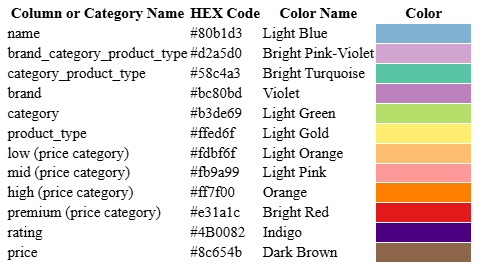

In [2]:
from IPython.display import Image, display

# Завантаження зображення кольрів
image_path = "color_table.png"  
display(Image(filename=image_path))

In [ ]:
## 1. Number of product names, brands, categories and types

**1.Кількість найменувань продуктів, брендів, категорій та типів**
- **Тип графіка:**
    -`barh` (горизонтальний стовпчастий графік)  
Показано: **Кількість унікальних значень** для кожної категорії даних. 
    

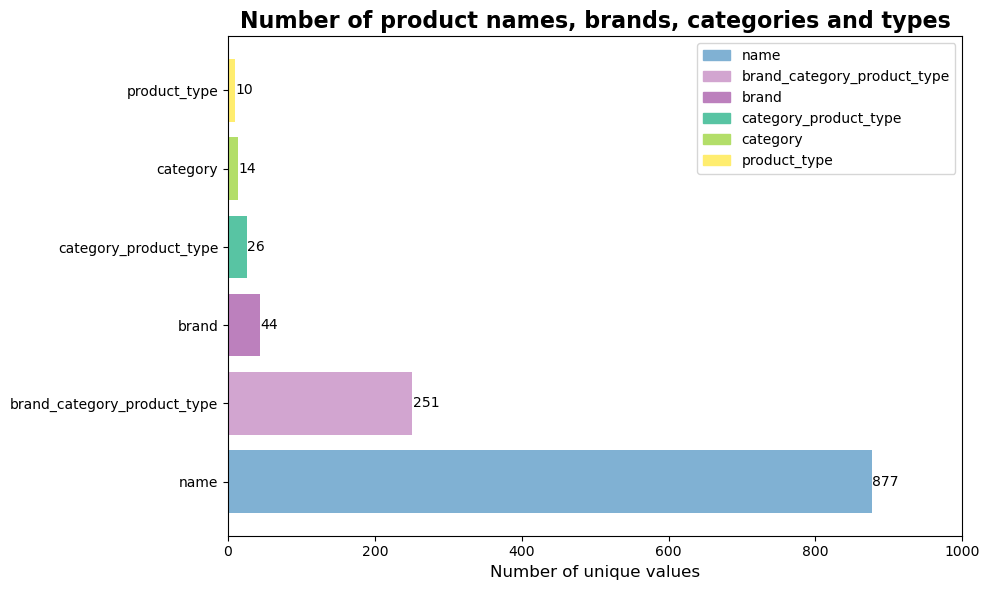

In [3]:
#1. Number of product names, brands, categories and types in the Makeup catalog 

import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
file_path = "makeup_valid_prices_filled_columns.csv"
df = pd.read_csv(file_path)

# Колонки та кольори (з оновленими кольорами)
columns_colors = {
    "name": "#80b1d3",  # Світло-синій
    "brand_category_product_type": "#d2a5d0",  # Яскравий рожево-фіолетовий
    "brand": "#bc80bd",  # Фіолетовий
    "category_product_type": "#58c4a3",  # Яскравий бірюзовий
    "category": "#b3de69",  # Світло-зелений (оновлено)
    "product_type": "#ffed6f",  # Світло-золотий (оновлено)
}

# Створення графіка
fig, ax = plt.subplots(figsize=(10, 6))

# Збір інформації для легенди
handles = []
labels = []

# Побудова горизонтальних барів 
# (ax.barh(i, unique_count, color=color, label=column) де barh горизонтальні bar - вертикальні)
for i, (column, color) in enumerate(columns_colors.items()):
    unique_count = df[column].nunique()
    ax.barh(i, unique_count, color=color, label=column)
    ax.text(unique_count + 0.5, i, str(unique_count), va='center', fontsize=10, color="black")
    handles.append(plt.Rectangle((0, 0), 1, 1, color=color))
    labels.append(column)

# Налаштування осей та підписів
ax.set_yticks(range(len(columns_colors)))
ax.set_yticklabels(list(columns_colors.keys()), fontsize=10)
ax.set_xlabel("Number of unique values", fontsize=12)
ax.set_title("Number of product names, brands, categories and types", fontsize=16, fontweight='bold')
ax.set_xlim(0, 1000)

# Легенда в тому ж порядку, що й бари
ax.legend(handles, labels, loc="upper right", fontsize=10)

plt.tight_layout()
plt.show()


# 1_Number_of_unique_values




## 2. Number of brands and products by combination of category and product type 

**2.Кількість брендів і продуктів за поєднанням категорії та типу продукту**
- **Тип графіка:** 
    -`barh` (графік з горизонтальними стовпцями)  
- **Показано:**  
   - **Brand** — Кількість унікальних брендів (зображено ліворуч).  
   - **Name** — Кількість унікальних продуктів (зображено праворуч) для кожної комбінації категорії та типу продукту (`category_product_type`).  
- **Особливість:** Центральна вертикальна вісь розділяє ці дві категорії.  
    

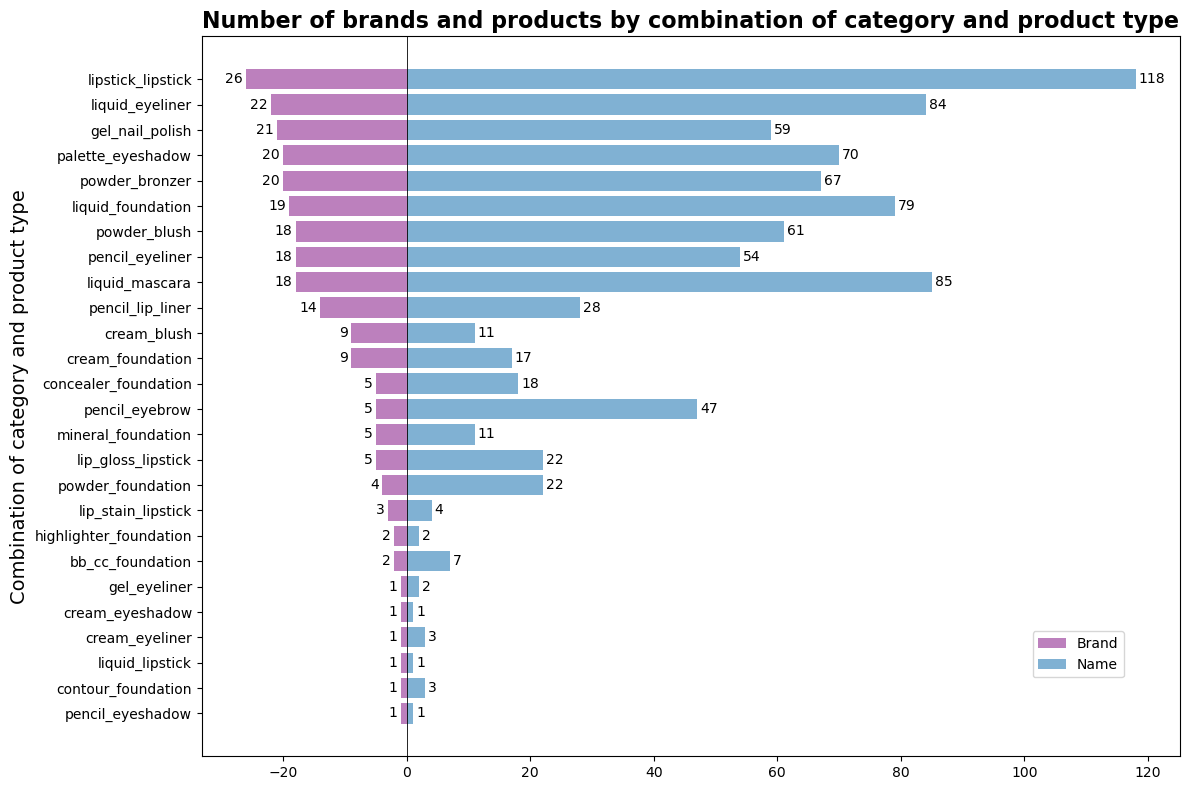

In [4]:
# 2. Number of brands and products by combination of category and product type

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних із файлу CSV
file_path = "makeup_valid_prices_filled_columns.csv"
data_frame = pd.read_csv(file_path)

# Підрахунок унікальних брендів і імен по кожній category_product_type
brand_counts = data_frame.groupby('category_product_type')['brand'].nunique()
name_counts = data_frame.groupby('category_product_type')['name'].nunique()

# Сортування за кількістю брендів (для естетики графіка)
sorted_indices = brand_counts.sort_values().index
brand_counts = brand_counts.loc[sorted_indices]
name_counts = name_counts.loc[sorted_indices]

# Значення для побудови (бренди → ліворуч, імена → праворуч)
brands = -brand_counts.values  # негативне значення для відображення ліворуч
names = name_counts.values  # позитивні значення для відображення праворуч

y_pos = np.arange(len(sorted_indices))

# Побудова графіка
plt.figure(figsize=(12, 8))

# Ліве крило (кількість брендів)
plt.barh(y_pos, brands, color='#bc80bd', label='Brand')  # Фіолетовий

# Праве крило (кількість імен)
plt.barh(y_pos, names, color='#80b1d3', label='Name')  # Світло-синій

# Позначки осі Y
plt.yticks(y_pos, sorted_indices)
plt.ylabel('Combination of category and product type', fontsize=14)

# Додавання підписів на стовпчиках
for i, (brand, name) in enumerate(zip(brands, names)):
    plt.text(brand - 0.5, i, str(abs(brand)), va='center', ha='right', color='black')
    plt.text(name + 0.5, i, str(name), va='center', ha='left', color='black')

# Оформлення
plt.axvline(0, color='black', linewidth=0.6)  # Центральна вісь
plt.title('Number of brands and products by combination of category and product type', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', bbox_to_anchor=(0.95, 0.1))

plt.tight_layout()
plt.show()


# 2_Number_brands_products_category_product_type



## 3. Number of Products by Price Category  
## 4. Price Category Share (%)  
## 5. Price Statistics  
## 6. Dependency Between Price and Rating  

**3. Кількість товарів за ціновою категорією**  
**4. Частка цінової категорії**  
**5. Статистика цін**  
**6. Залежність між ціною та рейтингом**  

- **Типи графіків:**  
   - `bar` (стовпчастий графік).  
   - `pie` (кругова діаграма).  
   - `boxplot` (графік-коробка).  
   - `scatter` (точковий графік).  

- **Показано:**  
   - **Стовпчастий графік:** кількість продуктів для кожної цінової категорії.  
   - **Кругова діаграма:** частка кожної цінової категорії у відсотках.  
   - **Боксплот:** Мінімальна, максимальна, медіанна ціна, а також перший і третій квартил цін.  
   - **Точковий графік:** залежність між ціною та рейтингом для продуктів із вказаними обома значеннями.
```


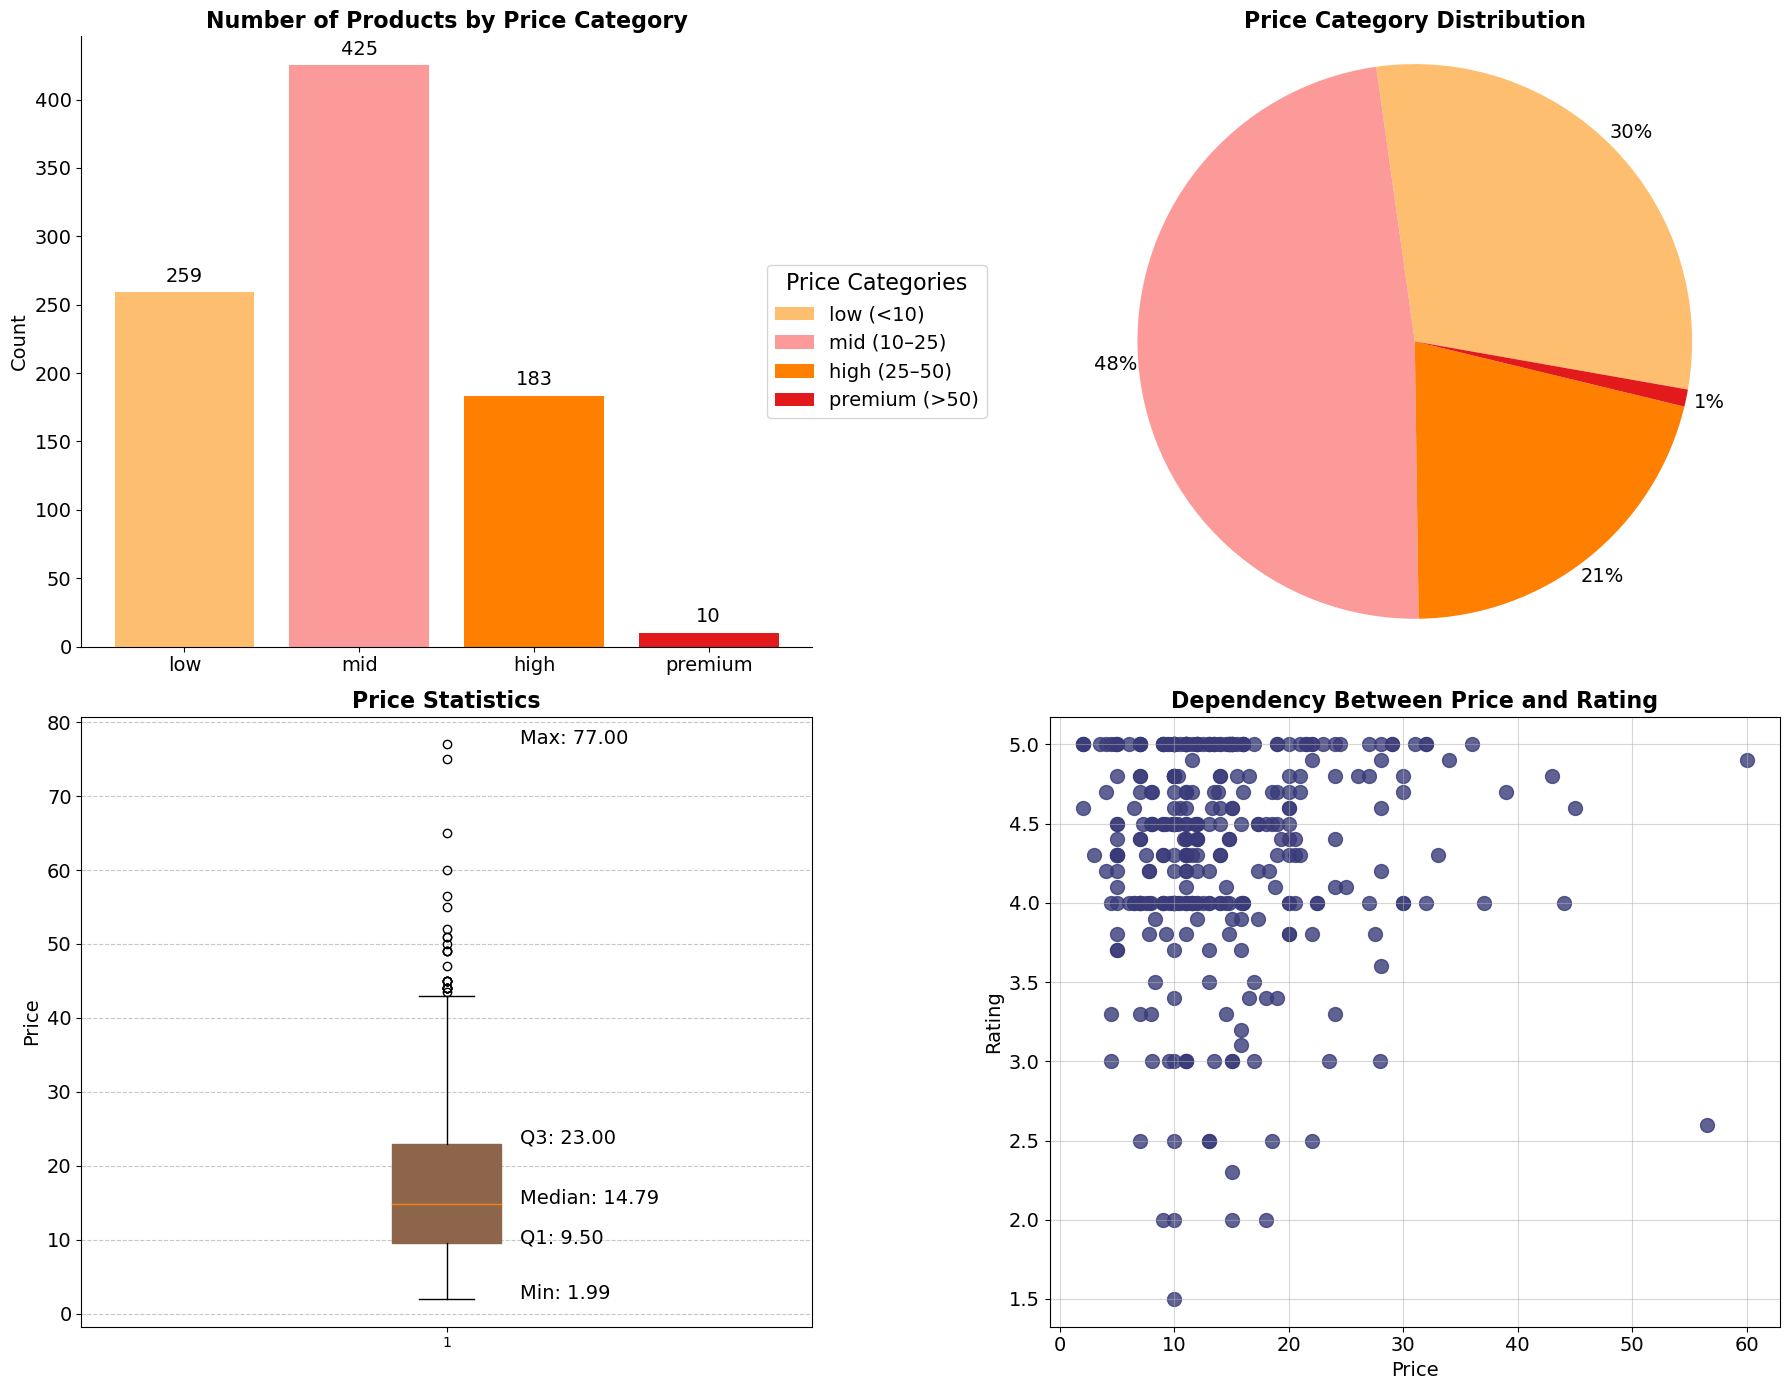

In [5]:
## 3. Number of Products by Price Category  
## 4. Price Category Share (%)
## 5. Price Statistics   
## 6. Dependency Between Price and Rating 


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних із файлу CSV
file_path = "makeup_valid_prices_filled_columns.csv"
df = pd.read_csv(file_path)

# ДАНІ ДЛЯ ЦІНОВИХ КАТЕГОРІЙ 
price_categories_colors = {
    "low": "#fdbf6f",
    "mid": "#fb9a99",
    "high": "#ff7f00",
    "premium": "#e31a1c"
}

price_counts = df["price_category"].value_counts().reindex(price_categories_colors.keys(), fill_value=0)
price_percentages = (price_counts / price_counts.sum() * 100).round(0)

data = df["price"]
min_val = data.min()
max_val = data.max()
median_val = data.median()
q1_val = data.quantile(0.25)
q3_val = data.quantile(0.75)

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
filtered_data = df.dropna(subset=['price', 'rating'])

# СТВОРЕННЯ ФІГУРИ 
fig, axs = plt.subplots(2, 2, figsize=(18, 14))

# 3: Стовпчиковий графік ---
bars = axs[0, 0].bar(
    price_counts.index,
    price_counts.values,
    color=[price_categories_colors[cat] for cat in price_counts.index]
)
axs[0, 0].set_title("Number of Products by Price Category", fontsize=16, fontweight='bold')
axs[0, 0].set_ylabel("Count", fontsize=14)
axs[0, 0].tick_params(axis='x', labelsize=14)
axs[0, 0].tick_params(axis='y', labelsize=14)
axs[0, 0].spines['top'].set_visible(False)
axs[0, 0].spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    axs[0, 0].text(bar.get_x() + bar.get_width() / 2, height + 5, str(int(height)),
                   ha="center", va="bottom", fontsize=14)

# 4: Секторний графік
wedges, _ = axs[0, 1].pie(
    price_percentages,
    labels=None,
    colors=[price_categories_colors[cat] for cat in price_percentages.index],
    startangle=350,
    radius=0.6
)
axs[0, 1].set_title("Price Category Distribution", fontsize=16, fontweight='bold')
axs[0, 1].axis("equal")

# Підписи біля секторів ближче до них
for wedge, pct, cat in zip(wedges, price_percentages, price_counts.index):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = 0.65 * np.cos(np.radians(angle))  
    y = 0.65 * np.sin(np.radians(angle))
    
    axs[0, 1].text(x, y, f'{int(pct)}%', ha='center', va='center', fontsize=14, color='black')
 # axs[0, 1].text(x, y, f'{cat}\n{price_counts[cat]} ({int(pct)}%)', ha='center', va='center', fontsize=14, color='black')

# Легенда зліва від графіка
legend_labels = ["low (<10)", "mid (10–25)", "high (25–50)", "premium (>50)"]
axs[0, 1].legend(
    wedges,
    legend_labels,
    title="Price Categories",
    loc="center left",
    bbox_to_anchor=(-0.4, 0.5),  # Розміщення легенди зліва
    fontsize=14,
    title_fontsize=16
)

# 5: Боксплот
axs[1, 0].boxplot(data, patch_artist=True, boxprops=dict(facecolor="#8c654b", color="#8c654b"))
axs[1, 0].set_title("Price Statistics", fontsize=16, fontweight='bold')
axs[1, 0].set_ylabel("Price", fontsize=14)
axs[1, 0].tick_params(axis='y', labelsize=14)
axs[1, 0].grid(axis="y", linestyle="--", alpha=0.7)
axs[1, 0].text(1.1, min_val, f"Min: {min_val:.2f}", fontsize=14, color="black")
axs[1, 0].text(1.1, max_val, f"Max: {max_val:.2f}", fontsize=14, color="black")
axs[1, 0].text(1.1, median_val, f"Median: {median_val:.2f}", fontsize=14, color="black")
axs[1, 0].text(1.1, q1_val, f"Q1: {q1_val:.2f}", fontsize=14, color="black")
axs[1, 0].text(1.1, q3_val, f"Q3: {q3_val:.2f}", fontsize=14, color="black")

# 6: Scatter Plot 
axs[1, 1].scatter(filtered_data['price'], filtered_data['rating'], s=100, color="#393b79", alpha=0.8)
axs[1, 1].set_title("Dependency Between Price and Rating", fontsize=16, fontweight='bold')
axs[1, 1].set_xlabel("Price", fontsize=14)
axs[1, 1].set_ylabel("Rating", fontsize=14)
axs[1, 1].tick_params(axis='x', labelsize=14)
axs[1, 1].tick_params(axis='y', labelsize=14)
axs[1, 1].grid(alpha=0.5)

# Оформлення відстані між графіками
plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Вертикальна і горизонтальна відстань
plt.tight_layout()
plt.show()

# 3_4_5_6_Price


## 7. Distribution of Product Ratings  
## 8. Proportion of Products with and without Rating  
## 9. How many types, categories, and brands have ratings?  

**7. Розподіл рейтингів товарів**  
**8. Частка товарів із рейтингом і без нього**  
**9. Скільки типів, категорій і брендів мають оцінки**  

- **Типи графіків:**  
    - `kdeplot` (графік оцінки густини).  
    - `pie` (кругова діаграма).  
    - `bar` (складений стовпчиковий графік).  

- **Показано:**  
    - Розподіл значень рейтингу для товарів у каталозі.  
    - Пропорція товарів із рейтингом та без нього у відсотках.  
    - Кількість типів, категорій і брендів із рейтингами, змішаними оцінками або без оцінок.  


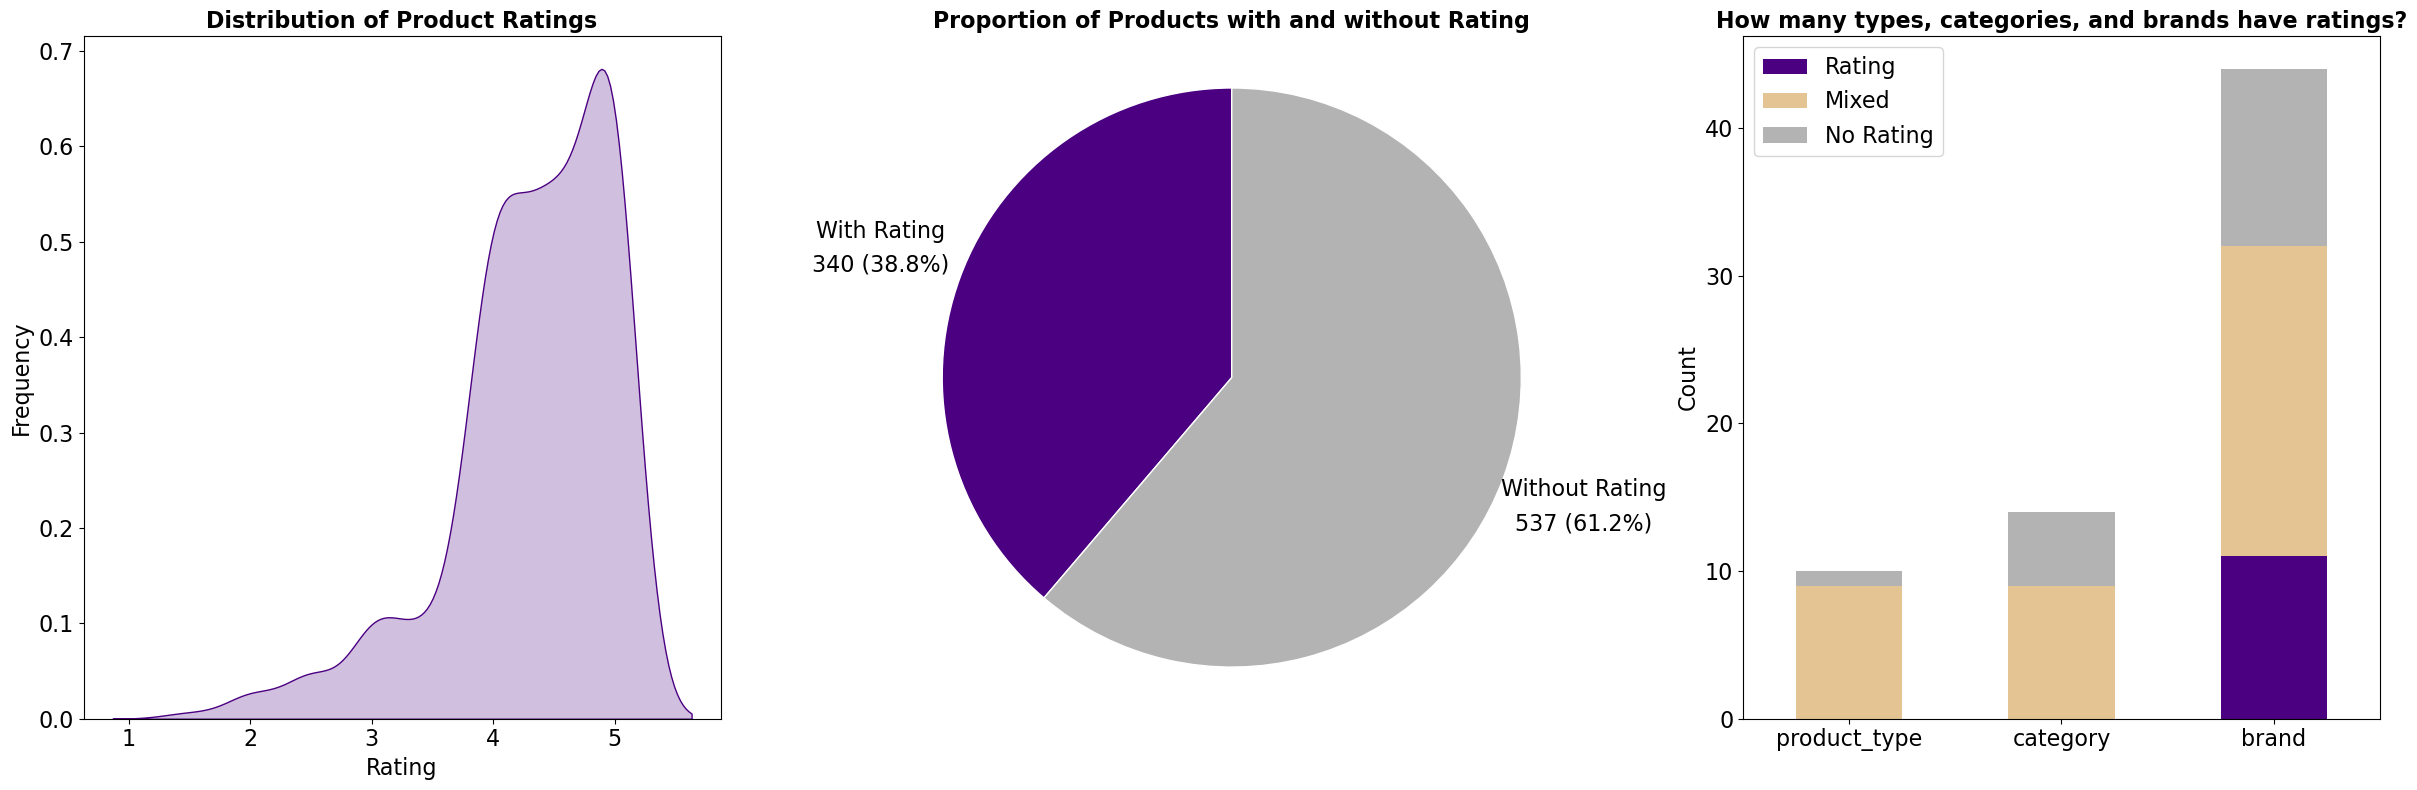

In [6]:
## 7. Distribution of Product Ratings 
## 8. Proportion of Products with and without Rating
## 9. How many types, categories, and brands have ratings?


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Завантаження даних
file_path = "makeup_valid_prices_filled_columns.csv"
df = pd.read_csv(file_path)

# Переконаємося, що 'rating' числовий
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
filtered_ratings = df.dropna(subset=['rating'])

# Обчислення кількості позицій із рейтингом та без нього
with_rating = filtered_ratings.shape[0]
without_rating = df.shape[0] - with_rating

# Дані для кругової діаграми
labels = ['With Rating', 'Without Rating']
sizes = [with_rating, without_rating]
colors = ['#4B0082', '#b3b3b3']  # Індиго і сірий

# Функція для визначення статусу
def determine_status(sub_df):
    total = len(sub_df)
    rated = sub_df['rating'].notna().sum()
    no_rating = sub_df['rating'].isna().sum()
    if rated == total:
        return "rating"
    elif no_rating == total:
        return "no_rating"
    else:
        return "mixed"

# Функція для підрахунку статусів
def count_statuses(df, column_name):
    statuses = df.groupby(column_name).apply(determine_status)
    counts = statuses.value_counts()
    return counts

# Побудова зведеної таблиці
summary = pd.DataFrame({
    'product_type': count_statuses(df, 'product_type'),
    'category': count_statuses(df, 'category'),
    'brand': count_statuses(df, 'brand')
}).fillna(0).astype(int)

# Фіксований порядок статусів
summary = summary.reindex(['rating', 'mixed', 'no_rating'])

# Створення фігури з трьома графіками на одній площині
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Графік 7: розподіл рейтингів
sns.kdeplot(
    data=filtered_ratings,
    x='rating',
    fill=True,
    color="#4B0082",
    ax=axes[0]
)
axes[0].set_title("Distribution of Product Ratings", fontsize=16, fontweight='bold')  # Жирний заголовок
axes[0].set_xlabel("Rating", fontsize=16, color='black')  # Написи осі X
axes[0].set_ylabel("Frequency", fontsize=16, color='black')  # Написи осі Y
axes[0].tick_params(axis='x', labelsize=16, labelcolor='black')  # Збільшено мітки осі X
axes[0].tick_params(axis='y', labelsize=16, labelcolor='black')  # Збільшено мітки осі Y

# Графік 8: кругова діаграма пропорції з/без рейтингу 
wedges, _ = axes[1].pie(
    sizes,
    labels=None,
    startangle=90,
    colors=colors,
    radius=0.85,  # Зменшення розміру кола
    wedgeprops=dict(edgecolor='white')
)
for i, wedge in enumerate(wedges):
    angle = (wedge.theta1 + wedge.theta2) / 2
    x = 1.1 * math.cos(math.radians(angle))  # Зменшено радіус підписів
    y = 1.1 * math.sin(math.radians(angle))
    axes[1].text(x, y + 0.05, labels[i], ha='center', va='center', fontsize=16, color='black')  # Написи не жирні
    percent = f"{sizes[i] / sum(sizes) * 100:.1f}%"
    axes[1].text(x, y - 0.05, f"{sizes[i]} ({percent})", ha='center', va='center', fontsize=16, color='black')  # Написи не жирні
axes[1].set_title("Proportion of Products with and without Rating", fontsize=16, fontweight='bold')  # Жирний заголовок
axes[1].axis('equal')

# Графік 9: складений стовпчиковий графік з легендою у лівому верхньому куті
summary.T.plot(
    kind='bar',
    stacked=True,
    color=['#4B0082', '#e5c494', '#b3b3b3'],
    ax=axes[2]
)
axes[2].set_xticklabels(summary.columns, rotation=0, fontsize=16, color='black')  
axes[2].set_title("How many types, categories, and brands have ratings?", fontsize=16, fontweight='bold')  
axes[2].set_ylabel("Count", fontsize=16, color='black')  
axes[2].tick_params(axis='x', labelsize=16, labelcolor='black')  
axes[2].tick_params(axis='y', labelsize=16, labelcolor='black')  

# Легенда у лівому верхньому куті графіка
legend = axes[2].legend(["Rating", "Mixed", "No Rating"], loc='upper left', fontsize=16)

# Оформлення всіх графіків
plt.tight_layout()
plt.show()

# 7_8_9_Rating


## 10.Product Type: Count Products, Average Rating, and Average Price 

**10.Тип продукту: кількість продуктів, середній рейтинг і середня ціна**  
    
- **Тип графіка:**  
   - Стовпчики: `bar` (стовпчастий графік).  
   - Лінії: `line` (лінійний графік).  
- **Показано:**  
   - **Стовпчики:** Кількість унікальних продуктів для кожного типу.  
   - **Лінії (середній рейтинг):** Відображено залежність середнього рейтингу для кожного типу продукту.  
   - **Лінії (середня ціна):** Показано середню ціну для кожного типу продукту.

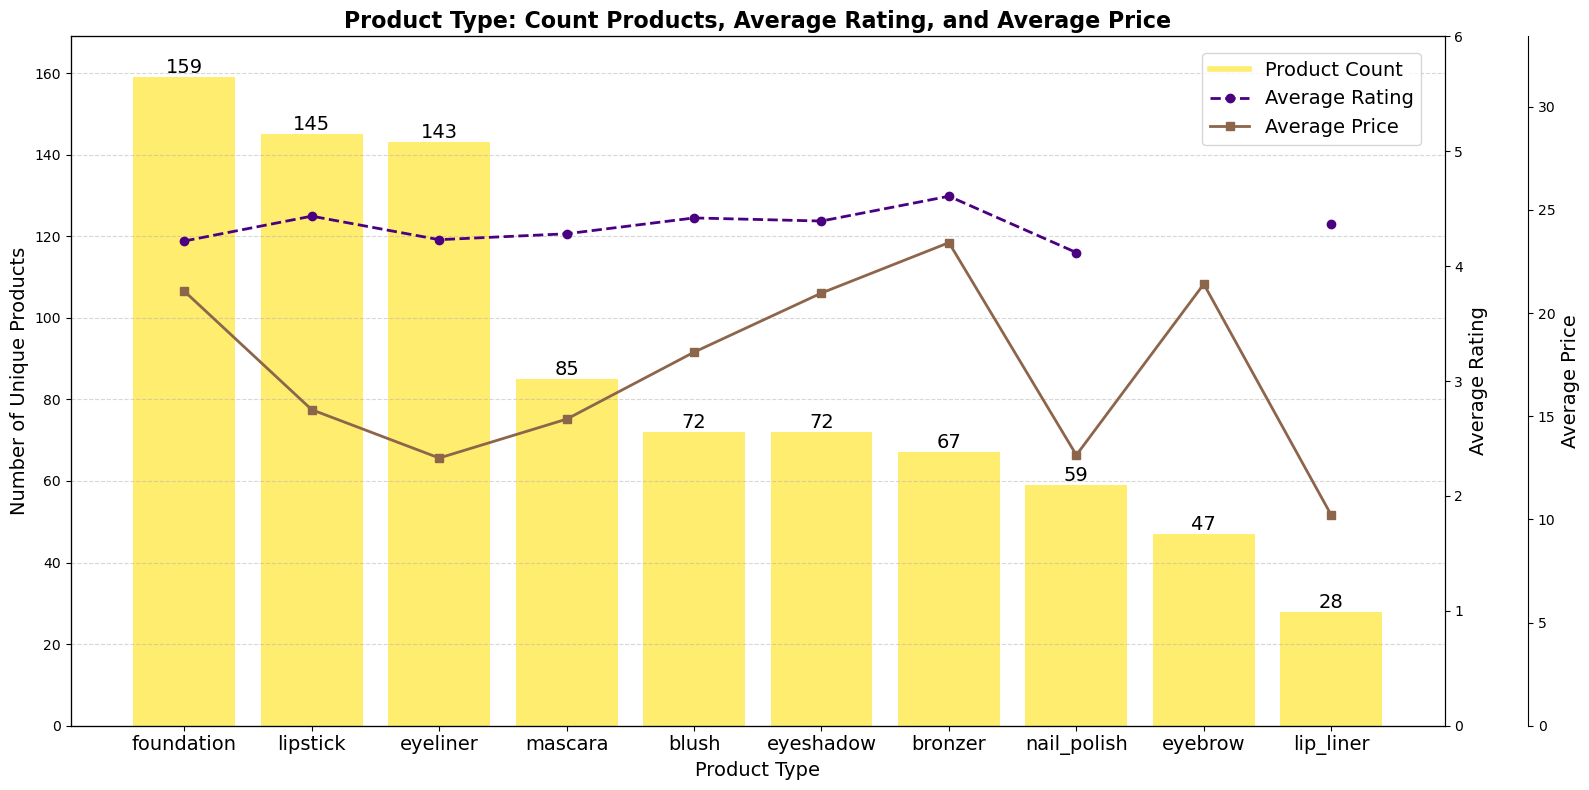

In [7]:
# 10.Product Type: Count Products, Average Rating, and Average Price

import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
file_path = "makeup_valid_prices_filled_columns.csv"
df = pd.read_csv(file_path)

# Групування за типом продукту та обчислення необхідних показників
grouped = df.groupby('product_type').agg({
    'id': 'nunique',  # Кількість унікальних продуктів
    'rating': 'mean',  # Середній рейтинг
    'price': 'mean'    # Середня ціна
}).reset_index()

# Сортування за кількістю продуктів у спадному порядку
grouped = grouped.sort_values(by='id', ascending=False)

# Підготовка даних для графіка
types = grouped['product_type']
counts = grouped['id']
avg_ratings = grouped['rating']
avg_prices = grouped['price']

# Кольори для графіка
bar_color = '#ffed6f'      # Світло-золотий
rating_color = '#4B0082'   # Індиго
price_color = '#8c654b'    # Коричневий

# Створення полотна
fig, ax1 = plt.subplots(figsize=(16, 8))

# Стовпчики — кількість унікальних продуктів
bars = ax1.bar(types, counts, color=bar_color)
ax1.set_xlabel("Product Type", fontsize=14,  color='black')  # Підпис осі X
ax1.set_ylabel("Number of Unique Products", fontsize=14, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(range(len(types)))
ax1.set_xticklabels(types, rotation=0, ha='center', fontsize=14, color='black')  # Збільшений розмір тексту на осі X
ax1.grid(axis='y', linestyle='--', alpha=0.5)
ax1.set_ylim(0, counts.max() + 10)

# Друга вісь Y — середній рейтинг
ax2 = ax1.twinx()
ax2.plot(types, avg_ratings, color=rating_color, marker='o', linestyle='--', linewidth=2, label='Average Rating')
ax2.set_ylabel("Average Rating", fontsize=14, color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, 6)

# Третя вісь Y — середня ціна
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(types, avg_prices, color=price_color, marker='s', linestyle='-', linewidth=2, label='Average Price')
ax3.set_ylabel("Average Price", fontsize=14, color='black')
ax3.tick_params(axis='y', labelcolor='black')
ax3.set_ylim(0, avg_prices.max() + 10)

# Легенда
bars_patch = plt.Line2D([0], [0], color=bar_color, lw=4)
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
legend_elements = [bars_patch] + lines1 + lines2
legend_labels = ["Product Count"] + labels1 + labels2
ax1.legend(legend_elements, legend_labels, loc='upper right', bbox_to_anchor=(0.99, 0.99), fontsize=14)

# Додавання тексту над стовпчиками
for bar in bars:
    ax1.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(),  
        f'{int(bar.get_height())}',  
        ha='center',  
        va='bottom',  
        fontsize=14,  
        color='black' 
    )

# Заголовок графіка
plt.title("Product Type: Count Products, Average Rating, and Average Price", fontsize=16, fontweight='bold')

# Встановлення чорного кольору для всіх осей
for spine in ax1.spines.values():
    spine.set_color('black')
for spine in ax2.spines.values():
    spine.set_color('black')
for spine in ax3.spines.values():
    spine.set_color('black')

plt.tight_layout()
plt.show()

# 10_Product_Type


## 11. Category: Count Products, Average Rating, and Average Price

**11.Категорія: кількість продуктів, середній рейтинг і середня ціна** 
    
- **Тип графіка:**  
   - Стовпчики: `bar` (стовпчастий графік).  
   - Лінії: `line` (лінійний графік).  
- **Показано:**  
   - **Стовпчики:** Кількість унікальних продуктів для кожної категорії.  
   - **Лінії (середній рейтинг):** Відображено залежність середнього рейтингу для кожної категорії.  
   - **Лінії (середня ціна):** Показано середню ціну для кожної категорії.  
    

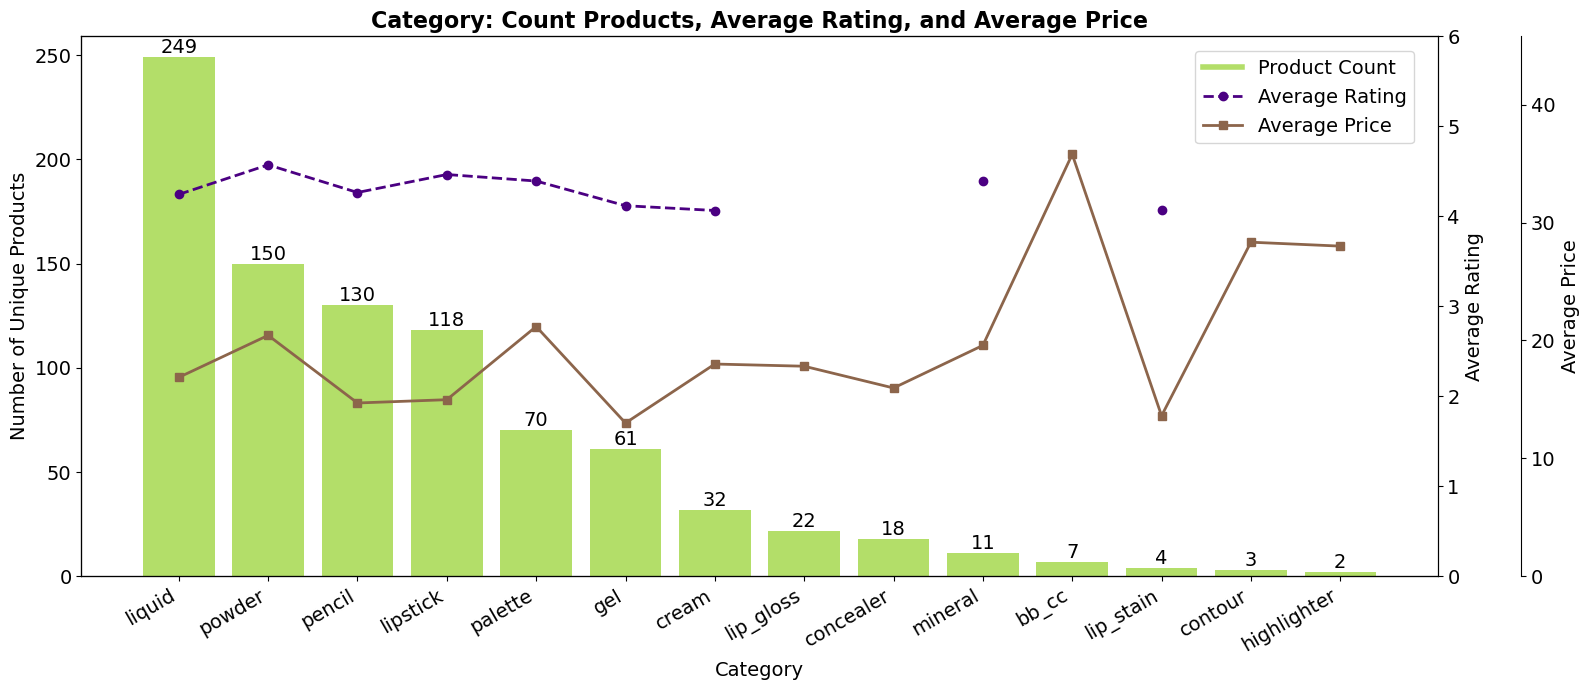

In [8]:
# 11. Category: Count Products, Average Rating, and Average Price

import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
file_path = "makeup_valid_prices_filled_columns.csv"
df = pd.read_csv(file_path)

# Групування за категорією та обчислення необхідних показників
grouped = df.groupby('category').agg({
    'id': 'nunique',  # Кількість унікальних продуктів
    'rating': 'mean',  # Середній рейтинг
    'price': 'mean'    # Середня ціна
}).reset_index()

# Сортування за кількістю продуктів у спадному порядку
grouped = grouped.sort_values(by='id', ascending=False)

# Підготовка даних для графіка
categories = grouped['category']
counts = grouped['id']
avg_ratings = grouped['rating']
avg_prices = grouped['price']

# Кольори для графіка
bar_color = '#b3de69'  # Світло-зелений для category
rating_color = '#4B0082'
price_color = '#8c654b'

# Створення графіка
fig, ax1 = plt.subplots(figsize=(16, 7))

bars = ax1.bar(categories, counts, color=bar_color)
ax1.set_xlabel("Category", fontsize=14, color='black')  # Підпис осі X
ax1.set_ylabel("Number of Unique Products", fontsize=14, color='black')  # Підпис осі Y без жирного шрифту
ax1.tick_params(axis='y', labelsize=14, labelcolor='black')  # Збільшення розміру тексту на осі Y
ax1.set_xticks(range(len(categories)))
ax1.set_xticklabels(categories, rotation=30, ha='right', fontsize=14, color='black')  
ax1.set_ylim(0, counts.max() + 10)

# Друга вісь Y — рейтинг
ax2 = ax1.twinx()
ax2.plot(categories, avg_ratings, color=rating_color, marker='o', linestyle='--', linewidth=2, label='Average Rating')
ax2.set_ylabel("Average Rating", fontsize=14, color='black')  # Підпис другої осі Y без жирного шрифту
ax2.tick_params(axis='y', labelsize=14, labelcolor='black')  # Збільшення розміру тексту на другій осі Y
ax2.set_ylim(0, 6)

# Третя вісь Y — ціна
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(categories, avg_prices, color=price_color, marker='s', linestyle='-', linewidth=2, label='Average Price')
ax3.set_ylabel("Average Price", fontsize=14, color='black')  
ax3.tick_params(axis='y', labelsize=14, labelcolor='black')  
ax3.set_ylim(0, avg_prices.max() + 10)

# Легенда
bars_patch = plt.Line2D([0], [0], color=bar_color, lw=4)
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
legend_elements = [bars_patch] + lines1 + lines2
legend_labels = ["Product Count"] + labels1 + labels2
ax1.legend(legend_elements, legend_labels, loc='upper right', bbox_to_anchor=(0.99, 0.99), fontsize=14)  # Збільшена легенда

# Додавання тексту над стовпчиками
for bar in bars:
    ax1.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{int(bar.get_height())}',
        ha='center',
        va='bottom',
        fontsize=14,  # Збільшений текст над стовпчиком
        color='black'
    )

# Заголовок
plt.title("Category: Count Products, Average Rating, and Average Price", fontsize=16, fontweight='bold')  # Жирний заголовок

# Встановлення чорного кольору для всіх осей
for spine in ax1.spines.values():
    spine.set_color('black')
for spine in ax2.spines.values():
    spine.set_color('black')
for spine in ax3.spines.values():
    spine.set_color('black')

plt.tight_layout()
plt.show()


# 11_Category

## 12. Connections Between Product Types and Categories

**12.Зв'язок між типами продуктів та їхніми категоріями**  

- **Тип графіка:** 
    -`Sankey Diagram` (санкей-діаграма).  
- **Показано:**  
   - Взаємозв'язок між типами продуктів та їх категоріями.  
   - Діаграма ілюструє, як обсяги продуктів розподіляються від кожного типу до відповідних категорій,
    використовуючи **ширину ліній для відображення кількісного відношення** між типами продуктів та категоріями.  
   - У підписах зазначено назви типів продуктів та категорій разом із їх загальною кількістю.


In [9]:
# 12. Connections Between Product Types and Categories

#import pandas as pd
#import plotly.graph_objects as go
#import plotly.express as px
#import plotly.io as pio

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px  

# Завантаження даних
file_path = "makeup_valid_prices_filled_columns.csv"
df = pd.read_csv(file_path)

# Групування
df_grouped = df.groupby(['product_type', 'category']).size().reset_index(name='count')
df_grouped = df_grouped[df_grouped['product_type'] != df_grouped['category']]  # прибрати петлі

# Створення міток з підписами (product_type + count, category + count)
product_counts = df_grouped.groupby('product_type')['count'].sum().to_dict()
category_counts = df_grouped.groupby('category')['count'].sum().to_dict()

product_types = list(product_counts.keys())
categories = list(category_counts.keys())
labels = [f"{pt} ({product_counts[pt]})" for pt in product_types] + [f"{cat} ({category_counts[cat]})" for cat in categories]

# Індекси джерел і цілей
source_indices = df_grouped['product_type'].apply(lambda x: product_types.index(x))
target_indices = df_grouped['category'].apply(lambda x: categories.index(x) + len(product_types))

# Кольори лінків за category
category_color_map = {cat: '#b3de69' if cat == 'category' else px.colors.qualitative.Plotly[i % 10] for i, cat in enumerate(categories)}
link_colors = df_grouped['category'].apply(lambda x: category_color_map[x]).tolist()

# Створення графіка
fig = go.Figure(data=[go.Sankey(
    arrangement='snap',
    node=dict(
        pad=20,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=labels,
        color="rgba(230,230,230,0.6)",
        hoverlabel=dict(font=dict(size=14))
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=df_grouped['count'],
        color=link_colors,
        hoverlabel=dict(font=dict(size=13))
    )
)])

# Оформлення
fig.update_layout(
    title=dict(
        text="<b>Connections Between Product Types and Categories</b>",  # Додаємо HTML для жирного заголовка
        font=dict(size=16),
        x=0.5,  # Вирівнювання заголовка по центру
        xanchor='center'
    ),
    font=dict(size=14),
    height=750,
    width=1100,
    margin=dict(l=50, r=150, t=80, b=40),
    annotations=[
        dict(x=0.01, y=1.05, text="Product Types", showarrow=False, font=dict(size=14)),
        dict(x=0.99, y=1.05, text="Categories", showarrow=False, xanchor='right', font=dict(size=14))
    ]
)

fig.show()


# 12_Product_Types_and_Categories_Sankey

## 13. Brands by Categories and Product Types with Ratings 

**13.Бренди за категоріями та видами продукції з рейтингами**

- **Тип графіка:** 
    -`treemap` (Деревовидна карта)  
- **Відображає:**  
   - Ієрархію брендів, що складається з категорій та типів продуктів.  
   - Значення рейтингу для кожного елемента ієрархії.  
   - Більш високий рейтинг позначений від помаранчевого до червоного, а нижчий — темнно сині, середні жовто-зелені.  

In [10]:
#13. Brands by Categories and Product Types with Ratings 


import pandas as pd
import plotly.express as px

import plotly.io as pio
pio.renderers.default = "notebook"  # або "browser"

# Завантаження даних
df = pd.read_csv("makeup_valid_prices_filled_columns.csv")
df = df[df['rating'].notna()]

# Побудова деревовидної карти
fig = px.treemap(
    df,
    path=['brand', 'product_type', 'category'],
    values='rating', #  values='price',
    color='rating',
    color_continuous_scale='Turbo',
    title="Treemap of Brands, Product Types, and Categories",
    width=1000,
    height=700
)

# color_continuous_scale='Inferno'  # Замінити 'Plasma' на 'Inferno', 'Viridis', 'Blues' або іншу палітру


# Оновлення стилю
fig.update_traces(root_color="white", textfont=dict(size=14))

fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(color='black', size=16),
    title=dict(
        text="Brands by Categories and Product Types with Ratings",
        font=dict(size=24, color='black'),
        x=0.1  # зміщення заголовка правіше (від 0 до 1)
    )
)

fig.show()


#13_Brands_Categories_Product_Type_Ratings_Treemap

## 14. All brands: number of products, average rating and average price 

**14.Усі бренди: кількість продуктів, середній рейтинг і середня ціна**  
    
- **Тип графіка:**  
   - Стовпчики: `bar` (стовпчастий графік).  
   - Лінії: `line` (лінійний графік).  
- **Показано:**  
   - **Стовпчики:** Кількість унікальних продуктів для кожного бренду.  
   - **Лінії (середній рейтинг):** Відображено залежність середнього рейтингу для кожного бренду.  
   - **Лінії (середня ціна):** Показано середню ціну для кожного бренду.  

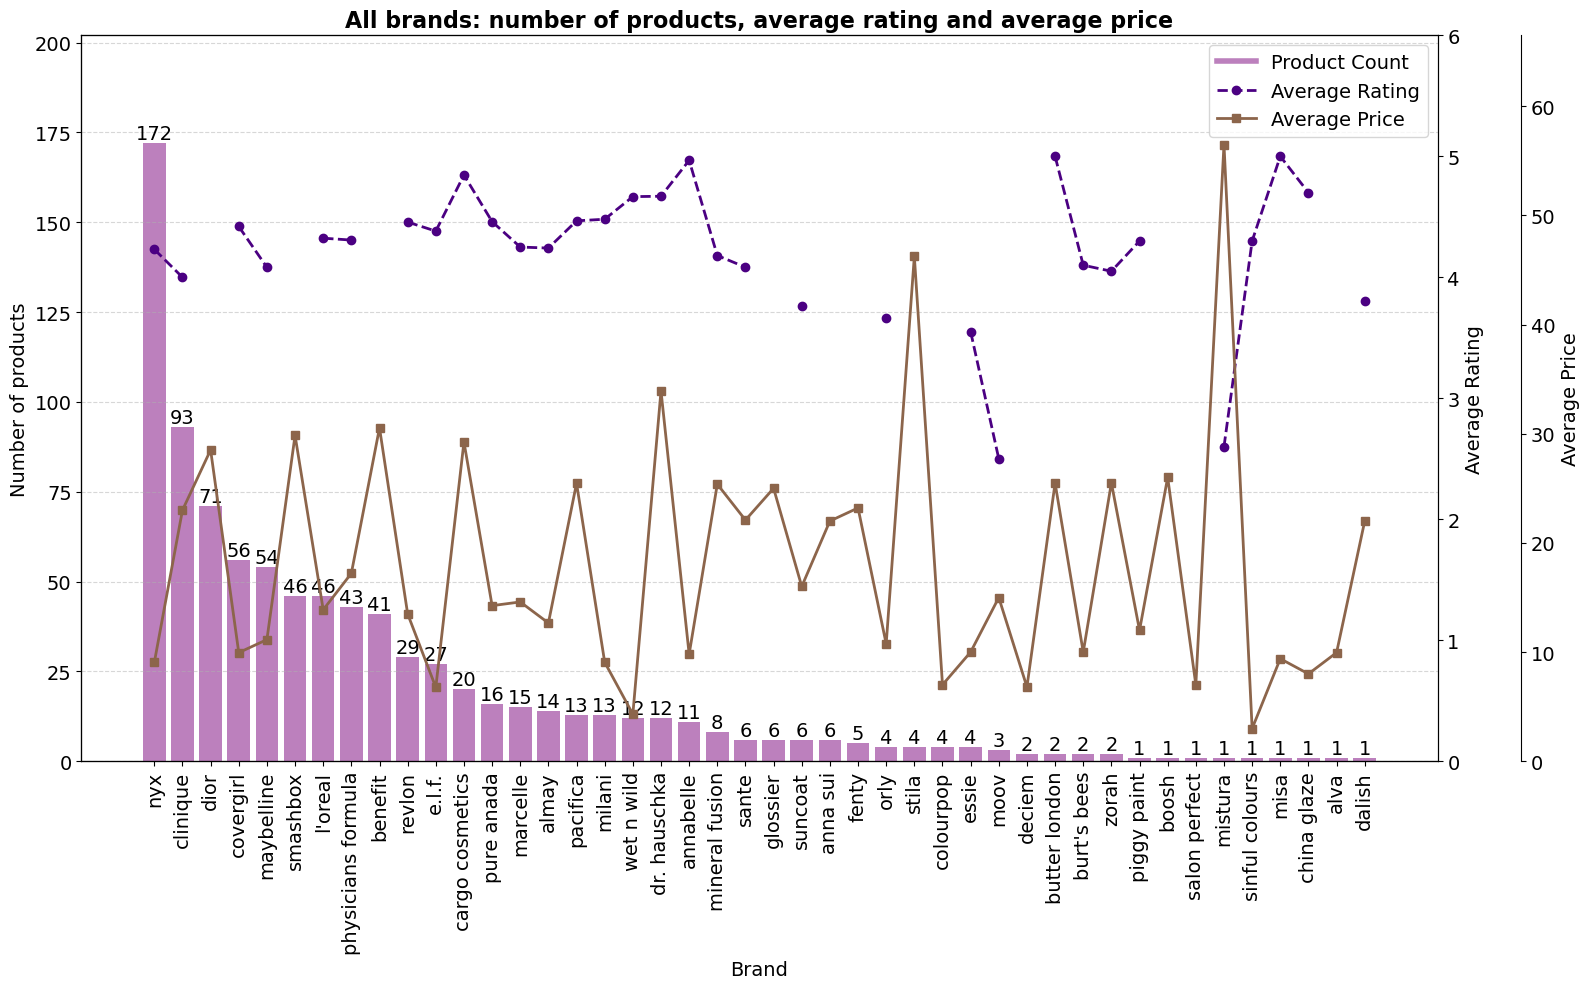

In [11]:
## 14. All brands: number of products, average rating and average price 

import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
file_path = "makeup_valid_prices_filled_columns.csv"
df = pd.read_csv(file_path)

# Групування за брендом і обчислення необхідних показників
grouped = df.groupby('brand').agg({
    'id': 'nunique',     # Кількість унікальних продуктів
    'rating': 'mean',    # Середній рейтинг
    'price': 'mean'      # Середня ціна
}).reset_index()

# Сортування за кількістю продуктів
grouped = grouped.sort_values(by='id', ascending=False)

# Підготовка даних для графіка
types = grouped['brand']
counts = grouped['id']
avg_ratings = grouped['rating']
avg_prices = grouped['price']

# Кольори
bar_color = '#bc80bd'  # Фіолетовий
rating_color = '#4B0082'  # Темно-фіолетовий
price_color = '#8c654b'  # Коричневий

# Створення графіка
fig, ax1 = plt.subplots(figsize=(16, 10))

# Графік для кількості продуктів
bars = ax1.bar(types, counts, color=bar_color)
ax1.set_xlabel("Brand", fontsize=14, color='black')  
ax1.set_ylabel("Number of products", fontsize=14, color='black')  
ax1.tick_params(axis='x', labelsize=14, labelcolor='black')  
ax1.tick_params(axis='y', labelsize=14, labelcolor='black')  
ax1.set_xticks(range(len(types)))
ax1.set_xticklabels(types, rotation=90, ha='center', fontsize=14, color='black')  
ax1.grid(axis='y', linestyle='--', alpha=0.5)
ax1.set_ylim(0, counts.max() + 30)

# Друга вісь Y — рейтинг
ax2 = ax1.twinx()
ax2.plot(types, avg_ratings, color=rating_color, marker='o', linestyle='--', linewidth=2, label='Average Rating')
ax2.set_ylabel("Average Rating", fontsize=14, color='black')  
ax2.tick_params(axis='y', labelsize=14, labelcolor='black')  
ax2.set_ylim(0, 6)

# Третя вісь Y — ціна
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(types, avg_prices, color=price_color, marker='s', linestyle='-', linewidth=2, label='Average Price')
ax3.set_ylabel("Average Price", fontsize=14, color='black')  
ax3.tick_params(axis='y', labelsize=14, labelcolor='black')  
ax3.set_ylim(0, avg_prices.max() + 10)

# Легенда
bars_patch = plt.Line2D([0], [0], color=bar_color, lw=4)
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
legend_elements = [bars_patch] + lines1 + lines2
legend_labels = ["Product Count"] + labels1 + labels2
ax1.legend(legend_elements, legend_labels, loc='upper right', bbox_to_anchor=(1, 1), fontsize=14)  # Легенда (шрифт 14)

# Додавання тексту над стовпчиками
for bar in bars:
    ax1.text(
        bar.get_x() + bar.get_width() / 2,  
        bar.get_height(),  
        f'{int(bar.get_height())}',  
        ha='center',  
        va='bottom',  
        fontsize=14,  
        color='black'  
    )

# Заголовок
plt.title("All brands: number of products, average rating and average price", fontsize=16, fontweight='bold')  

# Чорні шкали
for spine in ax1.spines.values():
    spine.set_color('black')
for spine in ax2.spines.values():
    spine.set_color('black')
for spine in ax3.spines.values():
    spine.set_color('black')

plt.tight_layout()
plt.show()

#14_All_brands


## 15. Coverage of Top 20 Brands in Product Distribution  
## 16. Visualization of Excluded Product


**15.Охоплення 20 найкращих брендів у розповсюдженні продукції**

**16.Візуалізація виключеного продукту**

- **Тип графіка:** 
    `donut chart`(Круговий графік) 
    `pie chart`(Круговий графік)
- **Показано:**  
   - Частка продуктів, що пропонуються топ-20 брендами, порівняно з рештою продуктів у наборі даних.  
   - Кількість категорій, типів продуктів та категорій-типів у межах топ-20 брендів
    - Візуалізація категорії типів продуктів (`Category_product_type`), які не входять до даних топ-20 брендів.  


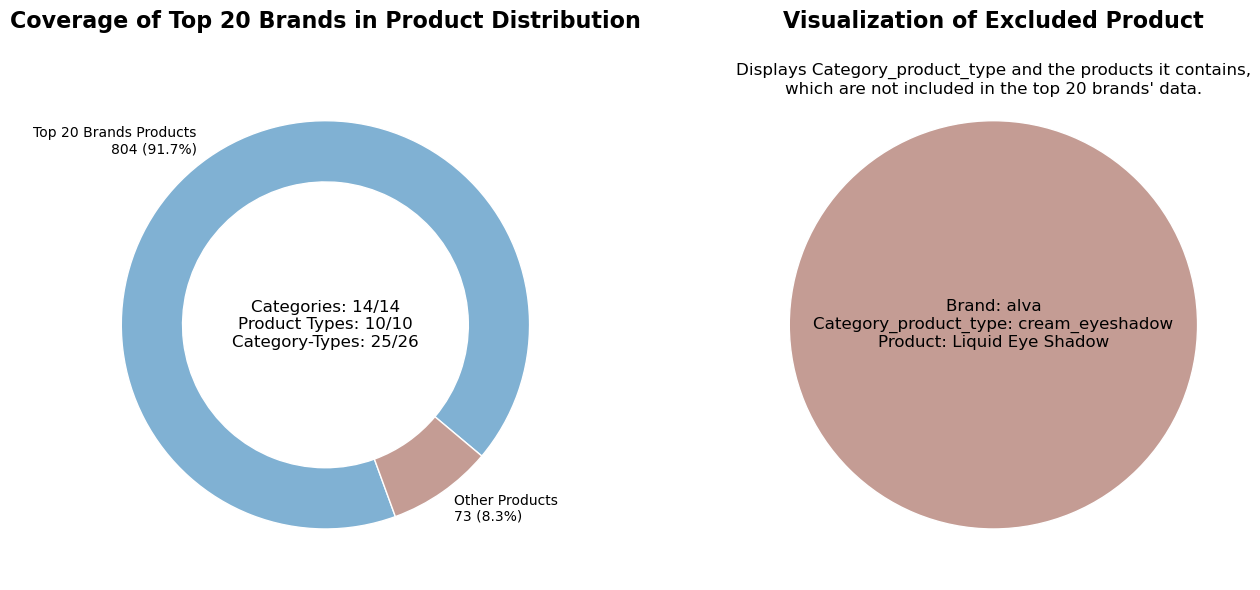

In [12]:
# 15. Coverage of Top 20 Brands in Product Distribution  
# 16. Visualization of Excluded Product* 


import pandas as pd
import matplotlib.pyplot as plt

# Дані з першого графіка
file_path = "makeup_valid_prices_filled_columns.csv"
df = pd.read_csv(file_path)

brand_counts = df['brand'].value_counts()
top_20_brands = brand_counts.head(20)
total_products = df['id'].count()
top_20_total_products = top_20_brands.sum()
percentage_top_20_products = (top_20_total_products / total_products) * 100

# Дані для підрахунку категорій, типів продуктів та зв'язків категорій і типів для топ-20 брендів
categories_count_top_20 = len(df[df['brand'].isin(top_20_brands.index)]['category'].unique())
product_types_count_top_20 = len(df[df['brand'].isin(top_20_brands.index)]['product_type'].unique())
category_product_types_count_top_20 = len(df[df['brand'].isin(top_20_brands.index)]['category_product_type'].unique())
total_categories = len(df['category'].unique())
total_product_types = len(df['product_type'].unique())
total_category_product_types = len(df['category_product_type'].unique())

# Дані для підписів
top_20_label = f"Top 20 Brands Products\n{top_20_total_products} ({percentage_top_20_products:.1f}%)"
other_label = f"Other Products\n{total_products - top_20_total_products} ({100 - percentage_top_20_products:.1f}%)"

# Дані для другого графіка
top_20_category_product_types = df[df['brand'].isin(top_20_brands.index)]['category_product_type'].unique()
all_category_product_types = df['category_product_type'].unique()
excluded_category_product_types = set(all_category_product_types) - set(top_20_category_product_types)

excluded_data = df[df['category_product_type'].isin(excluded_category_product_types)]
excluded_brands = excluded_data['brand'].value_counts()
excluded_brands = excluded_brands[excluded_brands == 1].index.tolist()

result_table = excluded_data[excluded_data['brand'].isin(excluded_brands)][['brand', 'category_product_type', 'id', 'name']]
brand = result_table['brand'].iloc[0]
category_product_type = result_table['category_product_type'].iloc[0]
product_name = result_table['name'].iloc[0]

# Побудова обох графіків поруч
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Перший графік: "бублик" для топ-20 брендів
axes[0].pie(
    [percentage_top_20_products, 100 - percentage_top_20_products],
    labels=[top_20_label, other_label],
    startangle=320,
    colors=['#80b1d3', '#c49c94'],
    wedgeprops={'width': 0.3, 'edgecolor': 'white'}
)
axes[0].set_title("Coverage of Top 20 Brands in Product Distribution", fontsize=16, pad=30, fontweight='bold')

# Додавання тексту всередину першого графіка без відсотків
central_text = (
    f"Categories: {categories_count_top_20}/{total_categories}\n"
    f"Product Types: {product_types_count_top_20}/{total_product_types}\n"
    f"Category-Types: {category_product_types_count_top_20}/{total_category_product_types}"
)
axes[0].text(0, 0, central_text, fontsize=12, ha='center', va='center')

# Другий графік: зафарбоване коло для виключеного продукту
axes[1].pie(
    [1],
    colors=['#c49c94'],
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Visualization of Excluded Product", fontsize=16, pad=30, fontweight='bold')  # Заголовки на одному рівні
axes[1].text(
    0.5, 0.98,  # Примітка ближче до заголовка
    "Displays Category_product_type and the products it contains,\nwhich are not included in the top 20 brands' data.",
    fontsize=12,
    ha='center',
    va='center',
    transform=axes[1].transAxes
)

# Додавання тексту всередину другого графіка
central_text_excluded = (
    f"Brand: {brand}\nCategory_product_type: {category_product_type}\nProduct: {product_name}"
)
axes[1].text(0, 0, central_text_excluded, fontsize=12, ha='center', va='center', color='black')

# Відображення графіків
plt.tight_layout()
plt.show()

# 15_16_Top_20_Brands_in_Product


## 17. Top 20 Brands Offering the Most Products 

**17.Топ-20 брендів, які пропонують найбільше продуктів**  
- **Тип графіка:**  
   - Стовпчики: `bar` (стовпчастий графік).  
   - Лінії: `line` (лінійні графіки).  
- **Показано:**  
   - **Стовпчики:** Кількість продуктів, що пропонуються кожним із топ-20 брендів.  
   - **Пунктирна лінія:** Середній рейтинг продуктів кожного бренду.  
   - **Суцільна лінія:** Середня ціна продуктів кожного бренду.  

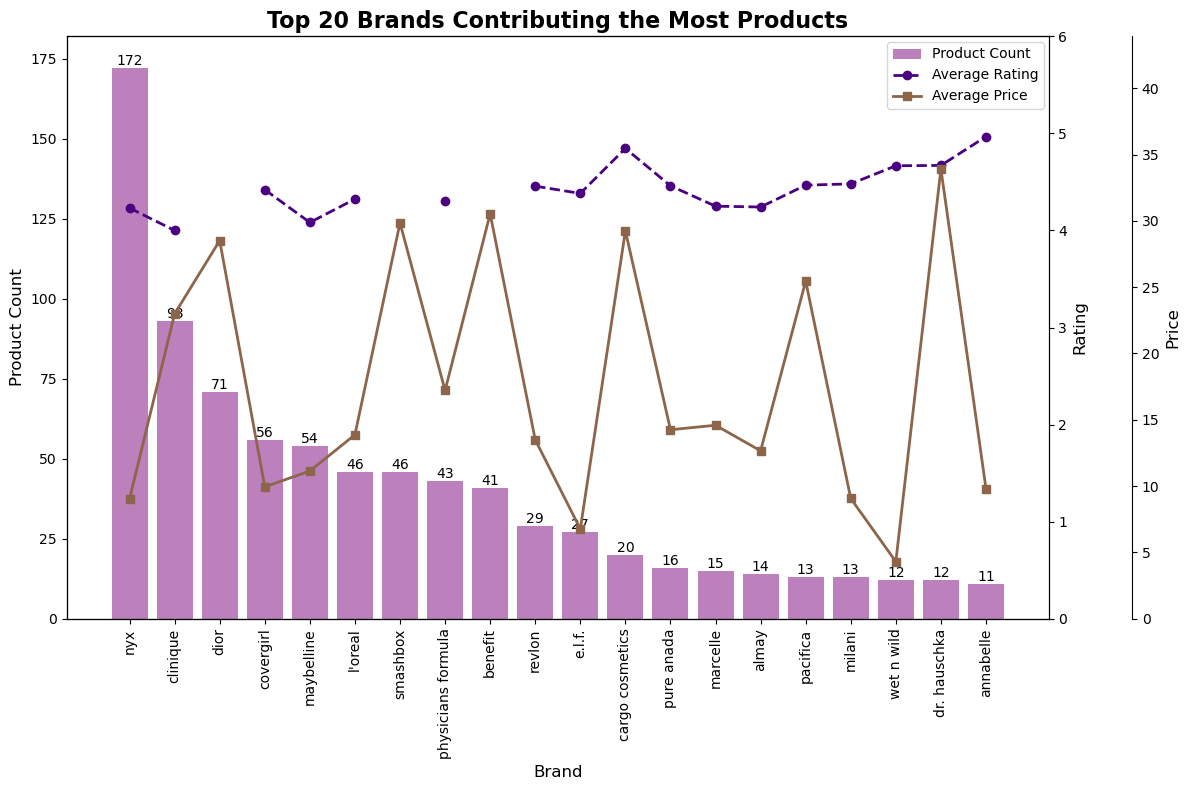

In [13]:
# 17. Top 20 Brands Offering the Most Products 


import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних із файлу CSV
file_path = "makeup_valid_prices_filled_columns.csv"
df = pd.read_csv(file_path)

# Підрахунок кількості продуктів для кожного бренду
brand_counts = df['brand'].value_counts()

# Вибір топ-20 брендів за кількістю продуктів
selected_brands = brand_counts.head(20)

# Обчислення середнього рейтингу та середньої ціни для топ-20 брендів
average_ratings = df.groupby('brand')['rating'].mean().loc[selected_brands.index]
average_prices = df.groupby('brand')['price'].mean().loc[selected_brands.index]

# Побудова графіка
fig, ax1 = plt.subplots(figsize=(12, 8))

# Ліва вісь (кількість продуктів)
bars = ax1.bar(
    selected_brands.index,
    selected_brands.values,
    color='#bc80bd',  # Фіолетовий колір, як у зразку
    label='Product Count'
)

# Додавання підписів над стовпчиками
for bar in bars:
    ax1.text(
        bar.get_x() + bar.get_width() / 2,  # Центрування тексту над стовпчиком
        bar.get_height(),  # Висота стовпчика
        f'{bar.get_height()}',  # Текст із кількістю продуктів
        ha='center',  # Горизонтальне вирівнювання
        va='bottom',  # Вертикальне вирівнювання
        fontsize=10,
        color='black'  # Чорний текст
    )

ax1.set_xlabel("Brand", fontsize=12)
ax1.set_ylabel("Product Count", fontsize=12)
ax1.set_xticks(range(len(selected_brands.index)))
ax1.set_xticklabels(selected_brands.index, rotation=90)  # Вертикальні підписи брендів
ax1.set_ylim(0, selected_brands.max() + 10)

# Права вісь (рейтинг)
ax2 = ax1.twinx()
ax2.plot(
    selected_brands.index,
    average_ratings,
    color='#4B0082',  # Індиго, як у зразку
    linestyle='--',  # Пунктирна лінія
    marker='o',  # Маркери на лінії
    linewidth=2,
    label='Average Rating'
)
ax2.set_ylabel("Rating", fontsize=12)
ax2.set_ylim(0, 6)  # Шкала для рейтингу

# Третя вісь (середня ціна)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Зміщення третьої осі
ax3.plot(
    selected_brands.index,
    average_prices,
    color='#8c654b',  # Коричневий колір, як у зразку
    linestyle='-',  # Суцільна лінія
    marker='s',  # Квадратні маркери
    linewidth=2,
    label='Average Price'
)
ax3.set_ylabel("Price", fontsize=12)
ax3.set_ylim(0, average_prices.max() + 10)  # Шкала для ціни

# Додавання легенди трохи нижче і лівіше
fig.legend(
    loc='upper right',  # Розташування у правому верхньому куті
    bbox_to_anchor=(0.88, 0.95),  # Зміщення трохи нижче і лівіше
    fontsize=10
)

# Додавання кількості брендів до заголовку
plt.title(f"Top 20 Brands Contributing the Most Products", fontsize=16, fontweight='bold' )

# Завершення оформлення графіка
plt.tight_layout()

# Відображення графіка
plt.show()

# 17_Top_20_Brands_analysis


## 18. Price Distribution for Top 20 Leading Brands

**18 Розподіл цін на 20 провідних брендів**

- **Тип графіка:** 
    -`boxplot` (боксплот).  
- **Показано:**  
   - **Розподіл цін:** Для кожного із топ-20 брендів на основі ціни їхніх продуктів.  
   - **Медіана цін:** Відображена всередині кожного боксу у вигляді числового значення.  
- **Особливості:**  
   - Боксплот демонструє мінімальні, максимальні ціни, перший та третій квартил, а також медіану кожного бренду.  
   - Легенда інформує, що медіани відображені на графіку.  

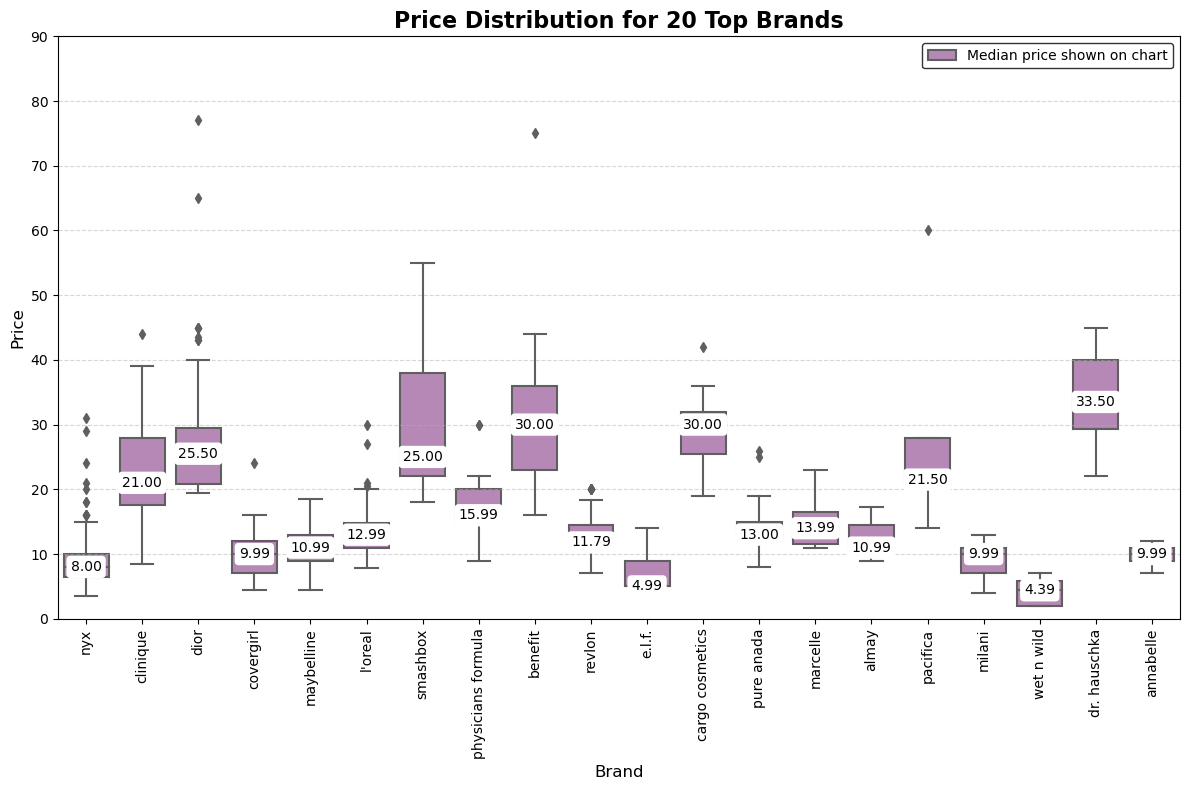

In [14]:
## 18. Price Distribution for Top 20 Leading Brands

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження даних
file_path = "makeup_valid_prices_filled_columns.csv"
df = pd.read_csv(file_path)

# Підрахунок кількості продуктів для кожного бренду
brand_counts = df['brand'].value_counts()

# Вибір топ-20 брендів за кількістю продуктів
selected_brands = brand_counts.head(20)

# Фільтрація даних для відібраних брендів
filtered_data = df[df['brand'].isin(selected_brands.index)]
median_prices = filtered_data.groupby('brand')['price'].median()

# Кількість брендів у топ-20
num_brands_top_20 = len(selected_brands)

# Побудова боксплоту
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=filtered_data,
    x='brand',
    y='price',
    order=selected_brands.index,  # Впорядкування боксів
    color='#bc80bd'  # Фіолетовий колір
)

# Додавання тексту медіани всередину кожного боксу
for i, brand in enumerate(selected_brands.index):
    median_price = median_prices[brand]
    plt.text(
        i,  # Позиція на осі X
        median_price,  # Рівень медіани на осі Y
        f'{median_price:.2f}',  # Текст медіани (2 знаки після коми)
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=10,
        color='black',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='white')  # Фон для читабельності
    )

# Додавання легенди з білим прямокутником і чорними краями
legend = plt.legend(
    ["Median price shown on chart"],  # Новий текст легенди
    loc="upper right",  # Розташування легенди
    fontsize=10,
    frameon=True  # Увімкнення рамки для легенди
)

# Налаштування стилю рамки
legend.get_frame().set_edgecolor('black')  

# Додавання загального заголовку
plt.title(f"Price Distribution for {num_brands_top_20} Top Brands", fontsize=16, fontweight='bold')

# Налаштування шкали осі Y
plt.ylim(0, 90)

# Оформлення графіка
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.xticks(rotation=90)  # Вертикальні підписи брендів
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Відображення графіка
plt.show()

## 18_Top_20_Brands_Price_statistics


## **19. Price Category Distribution Among Top 20 Brands**  

**19. Розподіл продуктів за ціновими категоріями серед топ-20 брендів**  

- **Тип графіка:**  
    - `stacked bar chart` (Накладені стовпчасті діаграми).  

- **Показано:**  
    - Процентний розподіл продуктів у різних цінових категоріях (`low`, `mid`, `high`, `premium`) серед топ-20 брендів.

Цей графік дозволяє оцінити, які бренди найактивніше працюють у кожній ціновій категорії, а також порівняти стратегії брендів у різних сегментах. 

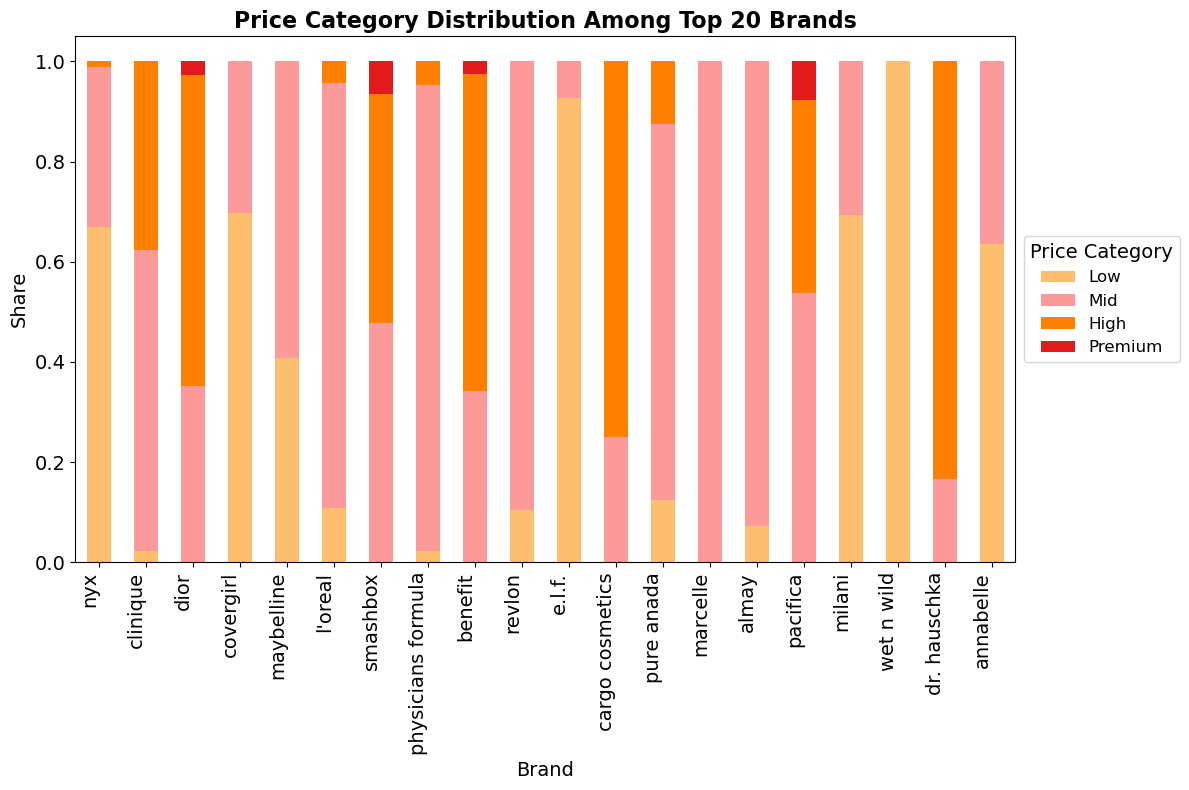

In [15]:
### 19. Price Category Distribution Among Top 20 Brands 


import pandas as pd
import matplotlib.pyplot as plt

# Отримуємо топ-20 брендів за кількістю товарів
top_20_brands = df['brand'].value_counts().head(20).index
df_top20 = df[df['brand'].isin(top_20_brands)]

# Групування по бренду та ціновій категорії
grouped = df_top20.groupby(['brand', 'price_category']).size().unstack(fill_value=0)

# Сортування категорій за ціною
price_order = ['low', 'mid', 'high', 'premium']
grouped = grouped[price_order]

# Переведення до часток
grouped_percent = grouped.div(grouped.sum(axis=1), axis=0)

# Кольори
color_map = {
    'low': '#fdbf6f',
    'mid': '#fb9a99',
    'high': '#ff7f00',
    'premium': '#e31a1c'
}

# Побудова stacked bar chart
ax = grouped_percent.loc[top_20_brands].plot(
    kind='bar',
    stacked=True,
    color=[color_map[col] for col in price_order],  # Відображення кольорів у правильному порядку
    figsize=(12, 8)
)

# Налаштування стилю
plt.title('Price Category Distribution Among Top 20 Brands', fontsize=16, fontweight='bold')
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Share', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Легенда (справа у стовпчик)
handles, labels = ax.get_legend_handles_labels()
new_labels = [label.capitalize() for label in labels]
ax.legend(
    handles, new_labels, title='Price Category', title_fontsize=14, fontsize=12,
    loc='center left', bbox_to_anchor=(1.0, 0.5)  # Легенда справа, вирівняна по центру
)

# Відображення графіка
plt.tight_layout()
plt.show()

## 19_Top_20_Brands_Price_Category

## 20. Distribution of Products Across Category-Product Types for Top 20 Brands 

**20.Розподіл продуктів за категоріями-типами продуктів серед топ-20 брендів**  

- **Тип графіка:**
    - `heatmap`(Теплова карта)
- **Показано:**  
   - Розподіл кількості продуктів для категорій-типів продуктів (`Category-product types`) серед топ-20 брендів.                                          
   
Цей графік дозволяє легко оцінити, які бренди найбільш активно працюють із різними категоріями-типами продуктів,
а також взаємозв’язок між ними. 

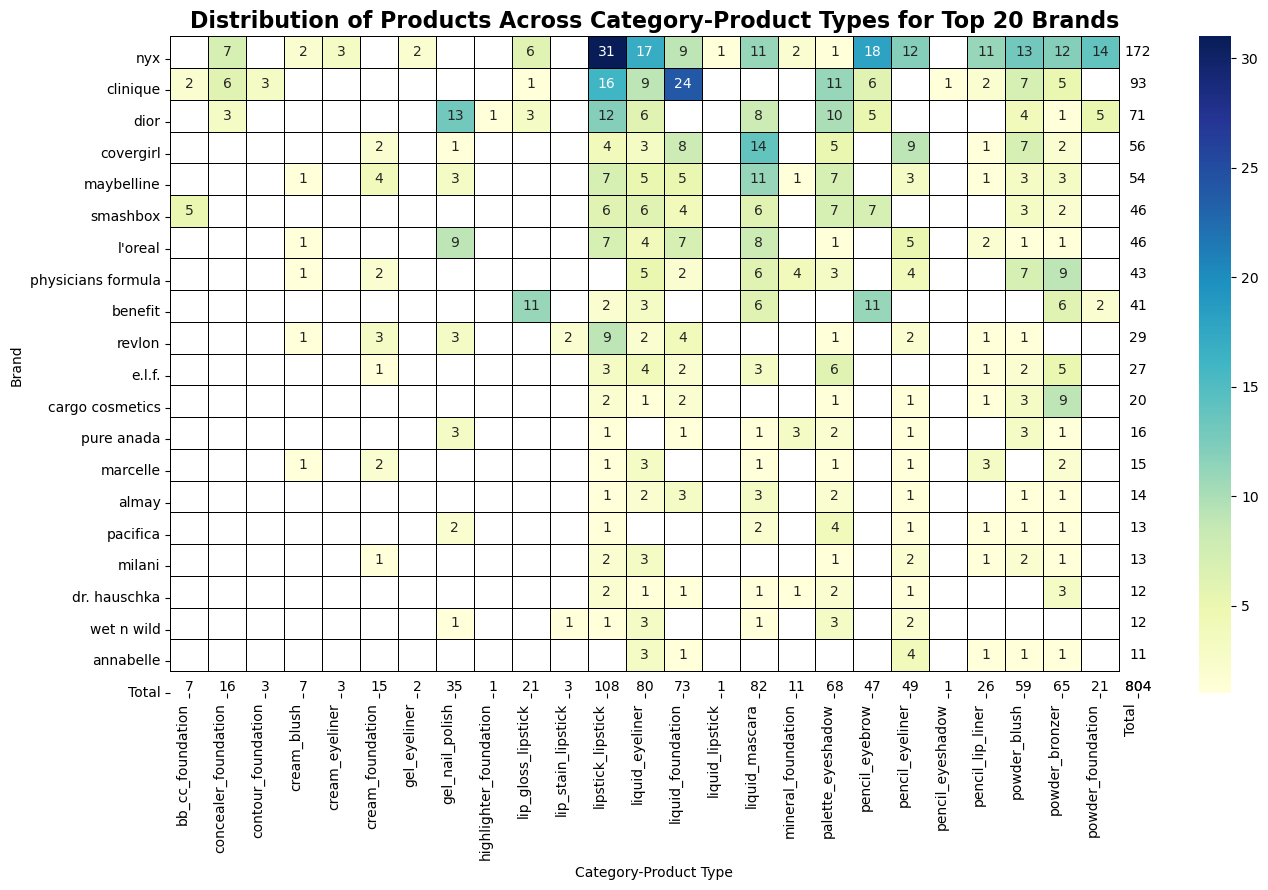

In [16]:
#20. Distribution of Products Across Category-Product Types for Top 20 Brands 


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Завантаження даних
df = pd.read_csv("makeup_valid_prices_filled_columns.csv")

# Підрахунок кількості продуктів для кожного бренду
bc = df['brand'].value_counts()

# Вибір топ-20 брендів за кількістю продуктів
sel = bc.head(20).index

# Фільтрація даних для відібраних брендів
f = df[df['brand'].isin(sel)]

# Підрахунок кількості продуктів для кожного бренду і category_product_type
counts = (
    f.groupby(['brand', 'category_product_type'])['id']
     .count()
     .unstack(fill_value=0)
)

# Додавання загальної кількості продуктів до таблиці
counts.loc['Total'] = counts.sum()
counts['Total'] = counts.sum(axis=1)

# Сортування брендів за загальною кількістю продуктів
sorted_counts = counts.sort_values(by='Total', ascending=False)

core = sorted_counts.drop(index='Total', columns='Total')

# Підготовка анотацій без нулів
annot = sorted_counts.loc[core.index, core.columns].astype(str)
annot[annot == '0'] = ''

# Маска для забарвлення лише ненульових значень core
mask = core == 0

#Hierarchy of Brands, Categories, and Product Types with Ratings in Makeup Catalog
plt.figure(figsize=(14, 9))
ax = sns.heatmap(
    core,
    annot=annot,
    fmt="",
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor="black",
    cbar=True,
    mask=mask
)

# Додавання міток на осі X і Y
xt = list(core.columns) + ['Total']
yt = list(core.index) + ['Total']

ax.set_xticks([i + 0.5 for i in range(len(xt))])
ax.set_xticklabels(xt, rotation=90, ha='right')
ax.set_yticks([i + 0.7 for i in range(len(yt))])
ax.set_yticklabels(yt, rotation=0)

# Додавання підсумкових значень у теплову карту
for i, col in enumerate(xt):
    v = sorted_counts.at['Total', col]
    ax.text(i + 0.5, len(core) + 0.5, v, ha='center', va='center')
for j, row in enumerate(yt):
    v = sorted_counts.at[row, 'Total']
    ax.text(len(core.columns) + 0.5, j + 0.5, v, ha='center', va='center')

# Заголовок і оформлення


plt.title("Distribution of Products Across Category-Product Types for Top 20 Brands", fontsize=16, fontweight='bold')
plt.xlabel("Category-Product Type")
plt.ylabel("Brand")
plt.tight_layout()

# Відображення графіка
plt.show()


# 20_Top_20_Brands_Across_Category_Product_Heatmap
